In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

FileNotFoundError: File b'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv' does not exist

In [54]:
df = df.loc[:,['data','totale_casi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-01 00:00:00", FMT)).days  )

In [55]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [59]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[0,10000,2000])
fit

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([    0., 10000.,  2000.]), array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

In [36]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.13038777691761208, 0.9214759914463105, 9427.173973995392]

In [37]:
sol = int(fsolve(lambda x : logistic_model(x,errors[0],errors[1],errors[2]) - int(errors[2]),errors[1]))

In [38]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [50]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0,0,500])

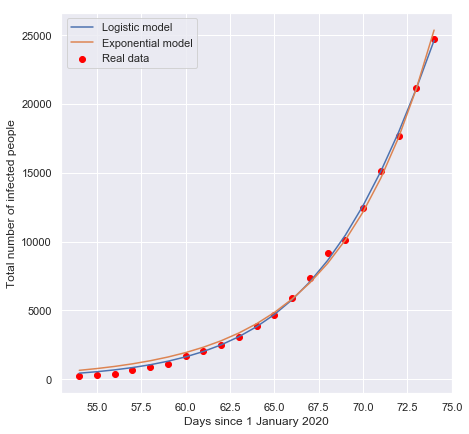

In [51]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
#plt.ylim((min(y)*0.9,c*1.1))
plt.show()